In [ ]:
#Colab Version

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

In [3]:
# get the CIFAR10 dataset
from tensorflow.keras.datasets import cifar10

In [4]:
# load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
# Normalize Data
x_train=x_train/255.0
x_test=x_test/255.0

We saw that this was the model with the best result, so we try to run this model in colab and increase the number of training epochs from 30 to 200, to give the model more of an opportunity to improve.

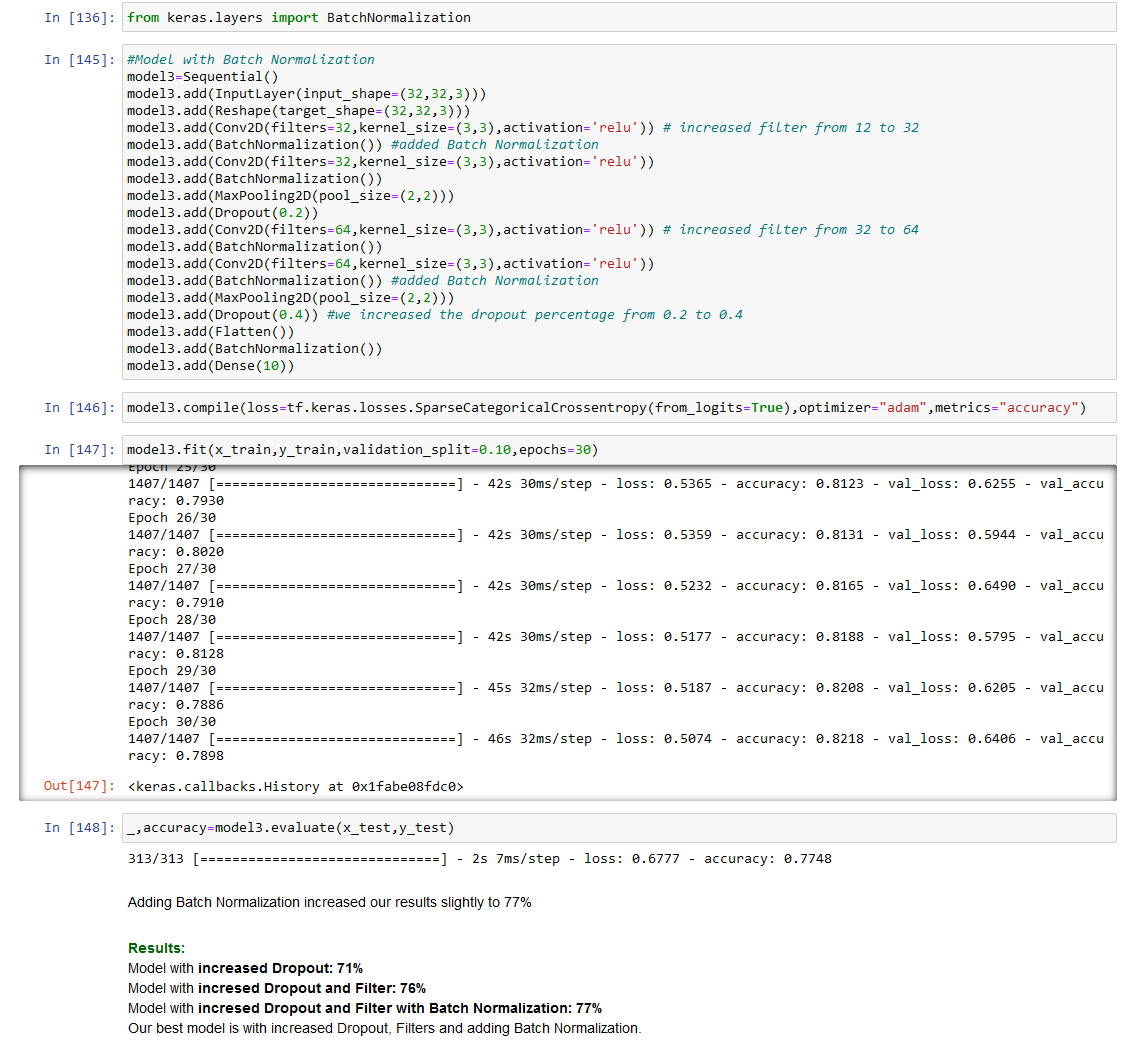

In [6]:
# CNN - build model

In [7]:
model3=Sequential()
model3.add(InputLayer(input_shape=(32,32,3)))
model3.add(Reshape(target_shape=(32,32,3)))
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu')) # increased filter from 12 to 32
model3.add(BatchNormalization()) #added Batch Normalization
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu')) # increased filter from 32 to 64
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model3.add(BatchNormalization()) #added Batch Normalization
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.4)) #we increased the dropout percentage from 0.2 to 0.4
model3.add(Flatten())
model3.add(BatchNormalization())
model3.add(Dense(10))

In [8]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [9]:
model3.fit(x_train,y_train,validation_split=0.10,epochs=200)

Epoch 1/200
1407/1407 [==============================] - 19s 7ms/step - loss: 1.5304 - accuracy: 0.4808 - val_loss: 1.1865 - val_accuracy: 0.5828
Epoch 2/200
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1124 - accuracy: 0.6189 - val_loss: 0.9949 - val_accuracy: 0.6606
Epoch 3/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9822 - accuracy: 0.6616 - val_loss: 0.8945 - val_accuracy: 0.6878
Epoch 4/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9093 - accuracy: 0.6888 - val_loss: 0.8243 - val_accuracy: 0.7218
Epoch 5/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8551 - accuracy: 0.7043 - val_loss: 0.8101 - val_accuracy: 0.7290
Epoch 6/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8184 - accuracy: 0.7180 - val_loss: 0.8656 - val_accuracy: 0.7084
Epoch 7/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7829 - accuracy: 0.7287 - val_loss: 0.7343 - val_a

In [10]:
_,accuracy=model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5835 - accuracy: 0.8162


With the same model but epoch=200 we reached an accuracy of 82%.<br>
The improvement trend seems to continue, so maybe with more epochs and some additional refularization we might be able to achieve better results.

In [11]:
_

0.5834879279136658